In [1]:
#로코나 백신 
df_vs = pd.read_csv('C:/Users/hongm/Downloads/covid19_vaccination.csv')
df_vs.head()

NameError: ignored

In [ ]:
df_vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8293 entries, 0 to 8292
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           8293 non-null   int64  
 1   date                                 8293 non-null   object 
 2   state                                8293 non-null   object 
 3   cases                                8293 non-null   int64  
 4   people_fully_vaccinated              8293 non-null   float64
 5   people_fully_vaccinated_per_hundred  8293 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 388.9+ KB


In [ ]:
df_vs['date'] = pd.to_datetime(df_vs['date'], format="%Y/%m/%d")

In [ ]:
df_vs['date_month']= df_vs['date'].dt.strftime('%y-%m')
df_vs['date_day']= df_vs['date'].dt.strftime('%d')

In [ ]:
df_vs.columns

Index(['Unnamed: 0', 'date', 'state', 'cases', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'date_month', 'date_day'],
      dtype='object')

In [ ]:
df_vs= df_vs[['state', 'cases', 'people_fully_vaccinated','date_month', 'date_day']]

In [ ]:
#매달 15일 기준으로 누적 데이터만을 뽑음 
df_vs_15 = df_vs[df_vs['date_day']== '15']
df_vs_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 93 to 8022
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    269 non-null    object 
 1   cases                    269 non-null    int64  
 2   people_fully_vaccinated  269 non-null    float64
 3   date_month               269 non-null    object 
 4   date_day                 269 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 12.6+ KB


In [ ]:
df_vs_15.groupby(['date_month','state']).sum()

cases  people_fully_vaccinated
date_month state                                          
21-01      Alabama         417528                  13488.0
           Alaska           51163                   9406.0
           Arizona         662597                  20837.0
           Arkansas        267635                  18781.0
           California     2937755                 204374.0
...                           ...                      ...
21-06      Virginia        677949                4166713.0
           Washington      447266                3889031.0
           West Virginia   163221                 640909.0
           Wisconsin       676619                2732030.0
           Wyoming          61303                 192334.0

[269 rows x 2 columns]

In [ ]:
df_vs_month = df_vs_15.groupby(['date_month']).sum()
df_vs_month
df_vs_month= df_vs_month.reset_index()
# df_vs_month.columns
# df_vs_month[['date_month','cases', 'people_fully_vaccinated']]

In [ ]:
df_vs_month_state = df_vs_15.groupby(['date_month','state']).sum()
df_vs_month_state=df_vs_month_state.reset_index()
df_vs_month_state



,date_month,state,cases,people_fully_vaccinated
0,21-01,Alabama,417528,13488.0
1,21-01,Alaska,51163,9406.0
2,21-01,Arizona,662597,20837.0
3,21-01,Arkansas,267635,18781.0
4,21-01,California,2937755,204374.0
...,...,...,...,...
264,21-06,Virginia,677949,4166713.0
265,21-06,Washington,447266,3889031.0
266,21-06,West Virginia,163221,640909.0
267,21-06,Wisconsin,676619,2732030.0


In [ ]:
df_raw = pd.read_csv('C:/Users/DMC CONET/Downloads/us-states.csv')
df_raw.info()

#datatime 타입 변경 
df_raw['date'] = pd.to_datetime(df_raw['date'], format="%Y/%m/%d")

#month와 day로 나누기 
df_raw['date_month']= df_raw['date'].dt.strftime('%y-%m')
df_raw['date_day']= df_raw['date'].dt.strftime('%d')

#컬럼
df_raw= df_raw[['state', 'cases','date_month', 'date_day']]
df_raw

#1월 11 이전까지 데이터 전처리
df_raw_be = df_raw[df_raw['date_month']<'21-01']
df_raw_be

#15일별 누적감염자수  
df_raw_15 = df_raw_be[df_raw_be['date_day']== '15']
df_raw_15.info()

#vacation 칼럼 추가 
df_raw_15['people_fully_vaccinated']= 0 
df_raw_15.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26139 entries, 0 to 26138
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    26139 non-null  object
 1   state   26139 non-null  object
 2   fips    26139 non-null  int64 
 3   cases   26139 non-null  int64 
 4   deaths  26139 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1021.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 115 to 15853
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       555 non-null    object
 1   cases       555 non-null    int64 
 2   date_month  555 non-null    object
 3   date_day    555 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.7+ KB


<ipython-input-151-067944f5530a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_15['people_fully_vaccinated']= 0


,state,cases,date_month,date_day,people_fully_vaccinated
115,Arizona,1,20-02,15,0
116,California,7,20-02,15,0
117,Illinois,2,20-02,15,0
118,Massachusetts,1,20-02,15,0
119,Texas,2,20-02,15,0


In [ ]:
df_raw_month = df_raw_15.groupby(['date_month']).sum()
df_raw_month= df_raw_month.reset_index()
df_raw_month

,date_month,cases,people_fully_vaccinated
0,20-02,15,0
1,20-03,3600,0
2,20-04,640742,0
3,20-05,1451093,0
4,20-06,2126574,0
5,20-07,3513790,0
6,20-08,5375527,0
7,20-09,6614317,0
8,20-10,8043257,0
9,20-11,11113634,0


In [ ]:
df_raw_state= df_raw_15.groupby(['date_month','state']).sum()
df_raw_state= df_raw_state.reset_index()
df_raw_state

,date_month,state,cases,people_fully_vaccinated
0,20-02,Arizona,1,0
1,20-02,California,7,0
2,20-02,Illinois,2,0
3,20-02,Massachusetts,1,0
4,20-02,Texas,2,0
...,...,...,...,...
550,20-12,Virginia,288309,0
551,20-12,Washington,214085,0
552,20-12,West Virginia,65708,0
553,20-12,Wisconsin,475340,0


In [ ]:
#합치기
result_month = pd.concat([df_raw_month ,df_vs_month],ignore_index=True)
print(result_month)

result_state = pd.concat([df_raw_state ,df_vs_month_state],ignore_index=True)
print(result_state)


   date_month     cases  people_fully_vaccinated
0       20-02        15                      0.0
1       20-03      3600                      0.0
2       20-04    640742                      0.0
3       20-05   1451093                      0.0
4       20-06   2126574                      0.0
5       20-07   3513790                      0.0
6       20-08   5375527                      0.0
7       20-09   6614317                      0.0
8       20-10   8043257                      0.0
9       20-11  11113634                      0.0
10      20-12  16772856                      0.0
11      21-01  22392842                1466513.0
12      21-03  27765747               35927860.0
13      21-04  29532028               72689789.0
14      21-05  30856215              112714964.0
15      21-06  31349772              134843018.0
    date_month          state   cases  people_fully_vaccinated
0        20-02        Arizona       1                      0.0
1        20-02     California       7    

In [ ]:
result_month

,date_month,cases,people_fully_vaccinated
0,20-02,15,0.0
1,20-03,3600,0.0
2,20-04,640742,0.0
3,20-05,1451093,0.0
4,20-06,2126574,0.0
5,20-07,3513790,0.0
6,20-08,5375527,0.0
7,20-09,6614317,0.0
8,20-10,8043257,0.0
9,20-11,11113634,0.0


In [ ]:
sns.barplot(x="tip", y="total_bill", data=result_month, palette='coolwarm')

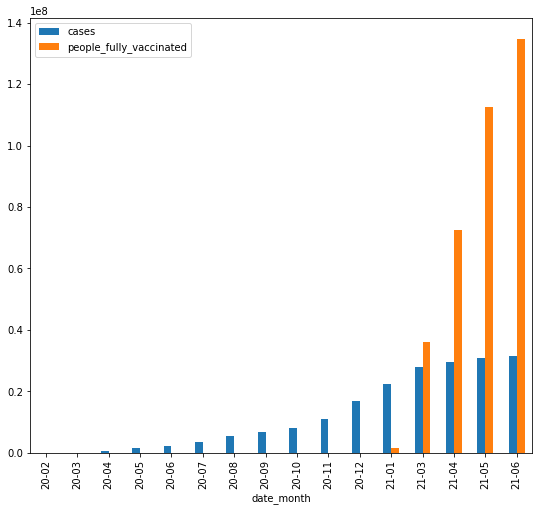

In [ ]:
#감염자 증가율 (매달)
import pandas as pd 
import matplotlib.pyplot as plt 



result_month.plot(x= "date_month", y=["cases", "people_fully_vaccinated"], kind="bar",figsize=(9,8))
plt.show()

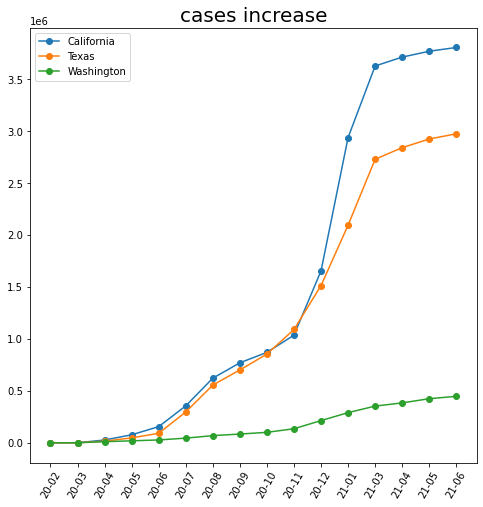

In [ ]:
import matplotlib.pyplot as plt
 
## 3개 데이터 분리
a_state = result_state.query('state =="California"') 
a_visits = a_state['cases']
days = a_state['date_month']
 
b_state = result_state.query('state =="Texas"') 
b_visits = b_state['cases']
 
c_state = result_state.query('state =="Washington"') 
c_visits = c_state['cases']
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(days,a_visits,marker='o',label='California') ## 선그래프 생성
ax.plot(days,b_visits,marker='o',label='Texas') 
ax.plot(days,c_visits,marker='o',label='Washington') 
 
ax.legend() ## 범례
 
plt.title('cases increase',fontsize=20) ## 타이틀 설정
plt.xticks(rotation=60) #x축 회전 
plt.show()

In [ ]:
result_state

,date_month,state,cases,people_fully_vaccinated
0,20-02,Arizona,1,0.0
1,20-02,California,7,0.0
2,20-02,Illinois,2,0.0
3,20-02,Massachusetts,1,0.0
4,20-02,Texas,2,0.0
...,...,...,...,...
819,21-06,Virginia,677949,4166713.0
820,21-06,Washington,447266,3889031.0
821,21-06,West Virginia,163221,640909.0
822,21-06,Wisconsin,676619,2732030.0


In [ ]:
plt.figure(figsize=(6, 3))
# plt.bar(x, y)
plt.bar(x, y, align='center', alpha=0.7, color='red')
plt.xticks(x)
plt.ylabel('Number of Students')
plt.title('Subjects')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

NameError: name 'x' is not defined

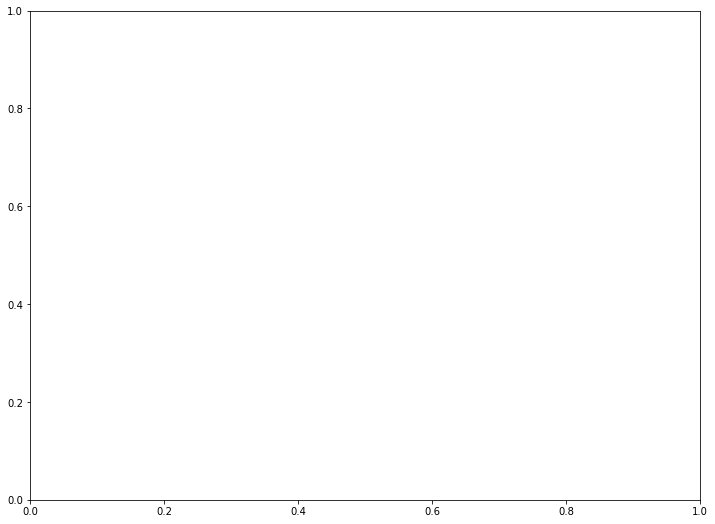

In [ ]:

width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.bar(x - width/2, 'cases', width, align='center', alpha=0.5)
axes.bar(x + width/2, result_month['people_fully_vaccinated'], width, align='center', alpha=0.8)

# xtick 설정
plt.xticks(result_month['date_month'])
# axes.set_xticklabels(x_label)
plt.ylabel('month by vac')
plt.title('백신')

plt.legend(['john', 'peter'])

plt.show()

In [ ]:
#상관관계
import missingno as msno

msno.heatmap()